In [41]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("salary.dataset.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


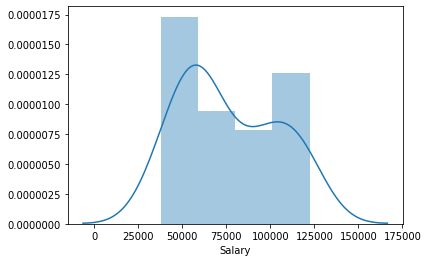

In [8]:
sns.distplot(df['Salary'])

In [9]:
df.YearsExperience.value_counts()

4.0     2
3.2     2
9.6     1
6.8     1
2.0     1
3.0     1
4.5     1
6.0     1
9.0     1
9.5     1
10.5    1
5.9     1
8.7     1
3.7     1
4.1     1
5.1     1
2.2     1
7.1     1
8.2     1
7.9     1
2.9     1
1.3     1
10.3    1
3.9     1
1.1     1
5.3     1
4.9     1
1.5     1
Name: YearsExperience, dtype: int64

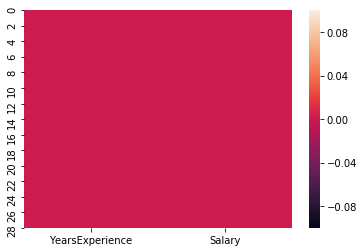

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

YearsExperience       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Salary             AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
dtype: object

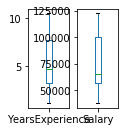

In [12]:
df.plot(kind='box',subplots=True,layout=(2,7))

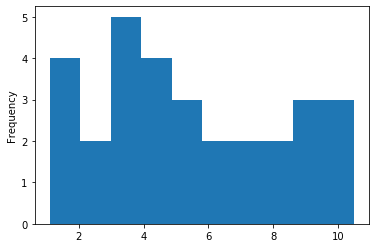

In [13]:
df['YearsExperience'].plot.hist()

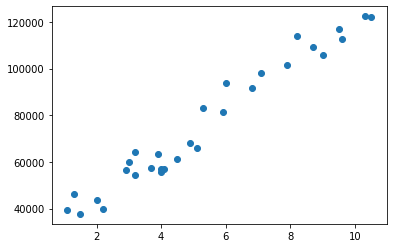

In [14]:
plt.scatter(df['YearsExperience'],df['Salary'])

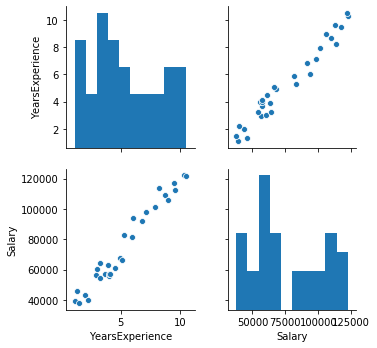

In [15]:
sns.pairplot(df)

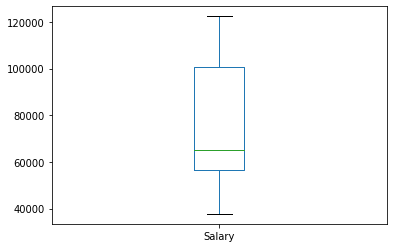

In [16]:
df['Salary'].plot.box()

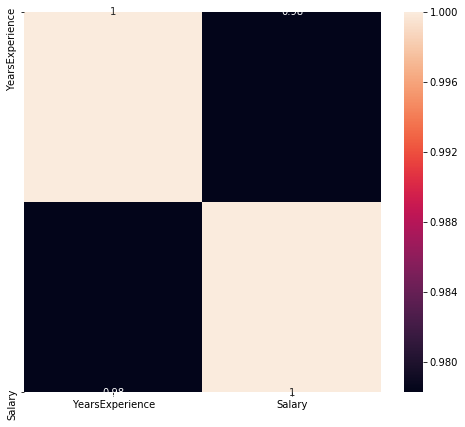

In [17]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [18]:
x=df.iloc[:,0:-1]
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [19]:
y=df.iloc[:,-1]
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [20]:
x.shape

(30, 1)

In [21]:
y.shape

(30,)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=4)

In [23]:
x_train.shape

(20, 1)

In [24]:
y_train.shape


(20,)

In [25]:
x_test.shape

(10, 1)

In [26]:
y_test.shape

(10,)

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr.coef_

array([9569.34042114])

In [30]:
lr.intercept_

24839.263212221318

In [31]:
lr.score(x_train,y_train)

0.954497400149652

In [32]:
pred=lr.predict(x_test)
print("Predicted salary:",pred)
print("actual salary",y_test)

Predicted salary: [ 63116.62489678  92781.58020231 123403.46954996  71729.03127581
  89910.77807597 110963.32700248  75556.76744426 125317.33763419
  82255.30573906  35365.53767547]
actual salary 11     55794.0
21     98273.0
28    122391.0
15     67938.0
20     91738.0
25    105582.0
17     83088.0
29    121872.0
19     93940.0
0      39343.0
Name: Salary, dtype: float64


In [33]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 5146.482122213041
Root Mean Squared Error: 5936.438844132109


In [34]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9468080828036048


In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = regressor.predict(x_test)

<function matplotlib.pyplot.show(*args, **kw)>

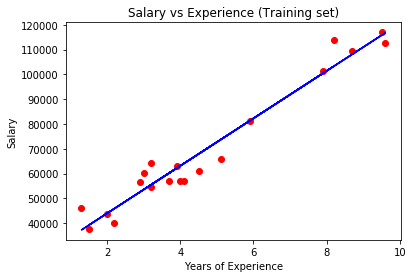

In [37]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

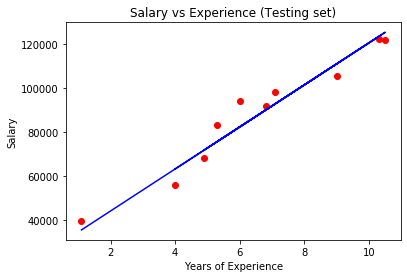

In [38]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Salary vs Experience (Testing set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show

In [42]:
from sklearn.externals import joblib
joblib.dump(regressor,'regressorsalary.obj')
rfr_from_joblib=joblib.load('regressorsalary.obj')